# Segundo examen parcial. Metodos Numericos

__Alumno__ Benjamin Rivera \
__Fecha__ Diciembre 10, 2020 \
__Entrega__ 17:45

Se recomienda ejecutar desde un servidor __jupyter__

In [1]:
import sys
import seaborn as sns
import scipy
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular 


from helper import romberg_iterativo

NOTEBOOK = True

## Primera perdicion (Ejercicio 1)



In [2]:
# Archivo.
def load_data(file_name , path_dir = 'datosEjercicio1'):
    full_path = path_dir+'/'+file_name

    # Guardando datos
    return np.load(full_path)


In [3]:
def creacion_matrices(datos):
    """ Funcion para crear las matrices D, M, P en 
    funcion de los datos recividos (2*m)
    
    return D, M, P
    """
    m = datos.shape[0]
    
    D = np.ones((m, 4))
    D[:, 0:2] = datos[:, 0:2]
    D[:, 3] = (datos[:,0]**2 
               + datos[:,1]**2) / 2
    
    M = np.array([[1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 0,-1],
         [0, 0,-1, 0]])
    
    dmults = D.transpose() @ D
    P = (1/m)*((dmults) @ M)
  
    return D, M, P


In [4]:
def potencia_inversa(P, x = np.array([1,0,0,0]), k=0, T=np.sqrt(np.finfo(float).eps)):
    """ Metodo de la potencia inversa """
    
    while True:
        y = LA.solve(P, x) # yk, xk
        x = y/LA.norm(y) # xk1, yk
        lamb = x @ P @ x.transpose()
        
        eps = LA.norm(P@x - lamb*x)
        if eps <= T:
            break
    return x

def v2u(v):
    """ Definimos u en funcion de v. """
    return (v[0]/v[2], v[1]/v[2], 1, v[3]/v[2])

def circle(u):
    """ Calculamos las caracteristicas del circulo. """
    c = (u[0], u[1])
    r = np.sqrt(u[0]**2 + u[1]**2 - 2*u[3])
    return c, r

In [5]:
def Ejercicio1(file_name):
    
    A = load_data(file_name)    
    D, M, P = creacion_matrices(A)
    c, r = circle(v2u(potencia_inversa(P)))
    
    m = A.shape[0]
    print(f"{m} {c} {r}")
    
    fig, ax = plt.subplots()
    
    ax.plot(A[:,0], A[:,1], 'ro')
    circ = plt.Circle(c, r, color='c')
    ax.add_artist(circ)
    

30 (2.972448019693739, 6.05683761891574) 4.395180050602966
30 (3.0332852128152776, 6.060505617651551) 4.450456035305542


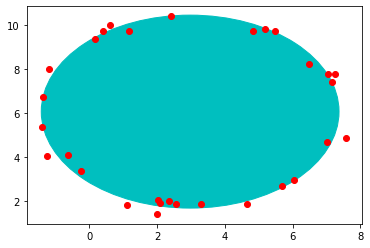

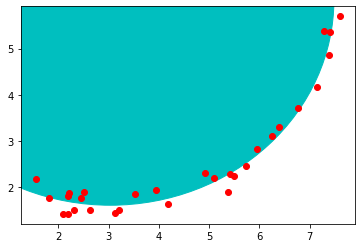

In [6]:
if not NOTEBOOK:
    file_name = str(input("Ingrese el nombre del archivo:\n"))
else:
    file_name = 'conjunto2D_1.npy'
    Ejercicio1(file_name)
    file_name = 'conjunto2D_2.npy'
    Ejercicio1(file_name)

## Segunda perdicion (Ejercicio 2)



In [7]:
def F(n):
    return lambda x: x**n/(5+x)

def prepare(m, N):
    mat = np.ones((N, 2))
    
    for i in range(N):
        f = F(i+1) 
        mat[i,0] = romberg_iterativo(f, m, (0, 1))
        mat[i,1] = romberg_iterativo(f, m+1, (0, 1))
    
    return mat

prepare(1, 5)

array([[0.08712121, 0.08807406],
       [0.06439394, 0.05962968],
       [0.0530303 , 0.04560159],
       [0.04734848, 0.03761705],
       [0.04450758, 0.03261789]])

In [8]:
def fun(N):
    """ Funcion que genera el arreglo n, usando 
    la furmula 2 de la tarea.
    """
    ret = np.ones(N)
    
    ret[0] = 1 - 5*np.log(6/5)
    for n in range(1, N):
        ret[n] = 1/(n+1) - 5*ret[n-1]
        
    return ret

fun(5)

array([0.08839222, 0.05803892, 0.04313873, 0.03430633, 0.02846835])

In [9]:
def escoger_m(N = 25):
    m = 1
    while True:
        A = prepare(m, N)
        E = abs(sum(A[:,0] - A[:,1]))/N
        if E < 0.00001:
            return m, E
        m+=1

def comparar():
    N = 25
    
    m, E = escoger_m(N=N)
    A = prepare(m, N)
    b = fun(N)

    
    for n in range(len(b)):
        dif = abs((b[n] - A[n,1])/A[n,1])
        print(f'{n+1} {A[n,1]} {b[n]} {dif}')
    
comparar()    

1 0.08839213832343877 0.08839221603022707 8.791142489541554e-07
2 0.05803930838280623 0.05803891984886467 6.6943241121852485e-06
3 0.04313933455081259 0.04313873408900998 1.3919125291702169e-05
4 0.034307141943202654 0.03430632955495011 2.367985808578842e-05
5 0.02846937653924657 0.02846835222524946 3.597950224502694e-05
6 0.024326141779807322 0.024324905540419356 5.081937773593723e-05
7 0.02123406331383248 0.02123261515504607 6.819979600726614e-05
8 0.01883858432321541 0.018836924224769652 8.812225044496816e-05
9 0.016928361912422196 0.016926489987262844 0.00011057922609622257
10 0.01536963436670621 0.015367550063685786 0.00013561175046162278
11 0.01407363450028484 0.01407134059066198 0.00016299340606107686
12 0.01297914773508081 0.012976630380023432 0.00019395380257318675
13 0.012042596609890353 0.012039925022959766 0.00022184475799783677
14 0.011232118179042485 0.011228946313772595 0.00028239244097417294
15 0.010523876985802429 0.010521935097803692 0.00018452211113422398
16 0.009899

### Comentario

El salto lo identifico en la aproximacion con `n=21`. Despues de eso el error ya no se puede reducir por que va arrastrando el error. 

Considero el error de la primera aproximacion se va introduciendo por los errores de valor flotante de la maquina, los cuales posteriormente no intenta corregir.

Respecto al metodo de romberg, ya habiamos notado que si es posible mejorar la precision en algun intervalo aumentando la discretizacion, sin embargo, eventualmente se vuelve a descomponer. Respecto a la aproximacion por formula, creo que no es posible mejorar este error incluso aumentando la discretizacion; esto debido a que es error del acarreo y no precisamente de la tecnica del metodo.